In [82]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
from sklearn.metrics import r2_score
import statistics as stat
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
from matplotlib.pyplot import subplots
import pandas as pd
import statsmodels.formula.api as smf 
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS
import math
import statsmodels.api as smf_non

In [2]:
convert = {'JAN': 1,
          'FEB': 2,
          'MAR': 3,
          'APR': 4, 
          'MAY': 5,
          'JUN': 6,
          'JUL': 7,
          'AUG': 8,
          'SEP': 9,
          'OCT': 10,
          'NOV': 11,
          'DEC': 12} 

In [3]:
sales = pd.read_csv("Car_sales.csv")

items = sales.columns.tolist()[5:-2]

items.append('Ratio_Used_New_Sales_Change')

items.remove( 'Avg_Used_Previous')

items.remove('Avg_New_Previous')

#items.remove('Ratio_Used_New_prev')

In [4]:
items

['Total Sales New',
 'Total Sales Used',
 'Avg_Used',
 'Avg_New',
 'Change_Car_Sales_Used',
 'Change_Car_Sales_New',
 'Ratio_Used_New_Sales_Change']

# Multinomial

In [6]:
# econ_data = ['MYAGM2USM052S', 'MEDCPIM158SFRBCLE', 'UNRATE', 'REAINTRATREARAT10Y', 'CORESTICKM159SFRBATL']

econ_data = ['MYAGM2USM052S_Prev', 'MEDCPIM158SFRBCLE_Prev', 'UNRATE_Prev', 'REAINTRATREARAT10Y_Prev', 'CORESTICKM159SFRBATL_Prev']








In [7]:
from itertools import combinations

In [8]:
combos = list(combinations(econ_data, 3))

In [9]:
for combo in combos:
    print(list(combo))

['MYAGM2USM052S_Prev', 'MEDCPIM158SFRBCLE_Prev', 'UNRATE_Prev']
['MYAGM2USM052S_Prev', 'MEDCPIM158SFRBCLE_Prev', 'REAINTRATREARAT10Y_Prev']
['MYAGM2USM052S_Prev', 'MEDCPIM158SFRBCLE_Prev', 'CORESTICKM159SFRBATL_Prev']
['MYAGM2USM052S_Prev', 'UNRATE_Prev', 'REAINTRATREARAT10Y_Prev']
['MYAGM2USM052S_Prev', 'UNRATE_Prev', 'CORESTICKM159SFRBATL_Prev']
['MYAGM2USM052S_Prev', 'REAINTRATREARAT10Y_Prev', 'CORESTICKM159SFRBATL_Prev']
['MEDCPIM158SFRBCLE_Prev', 'UNRATE_Prev', 'REAINTRATREARAT10Y_Prev']
['MEDCPIM158SFRBCLE_Prev', 'UNRATE_Prev', 'CORESTICKM159SFRBATL_Prev']
['MEDCPIM158SFRBCLE_Prev', 'REAINTRATREARAT10Y_Prev', 'CORESTICKM159SFRBATL_Prev']
['UNRATE_Prev', 'REAINTRATREARAT10Y_Prev', 'CORESTICKM159SFRBATL_Prev']


In [10]:
sales

,Unnamed: 0,Year,Month,New,Used,Total Sales New,Total Sales Used,Avg_Used,Avg_New,Avg_Used_Previous,Avg_New_Previous,Change_Car_Sales_Used,Change_Car_Sales_New,Ratio_Used_New,Ratio_Used_New_Sales
0,1,2002,FEB,27520,50982,664454223,361353242,7087.859284,24144.412173,7740.940353,24272.353244,-0.092141,-0.005299,1.852544,0.293561
1,2,2002,MAR,34225,58794,805666244,419385387,7133.132411,23540.284704,7087.859284,24144.412173,0.006347,-0.025664,1.717867,0.303018
2,3,2002,APR,36452,59817,846368297,433061150,7239.767123,23218.706710,7133.132411,23540.284704,0.014729,-0.013850,1.640980,0.311808
3,4,2002,MAY,37359,60577,855005784,442569410,7305.898443,22886.206376,7239.767123,23218.706710,0.009052,-0.014528,1.621483,0.319227
4,5,2002,JUN,36348,55415,830251613,414731166,7484.095750,22841.741306,7305.898443,22886.206376,0.023810,-0.001947,1.524568,0.327650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,249,2022,OCT,22255,47325,1060091844,804805365,17005.924247,47633.873017,17366.504576,47788.648533,-0.021203,-0.003249,2.126488,0.357013
249,250,2022,NOV,21117,43345,993531237,734729853,16950.740639,47048.881801,17005.924247,47633.873017,-0.003256,-0.012434,2.052612,0.360279
250,251,2022,DEC,23025,40906,1120587035,718545405,17565.770425,48668.275136,16950.740639,47048.881801,0.035013,0.033274,1.776591,0.360929
251,252,2023,JAN,21037,45543,992034915,762502754,16742.479722,47156.672292,17565.770425,48668.275136,-0.049174,-0.032055,2.164900,0.355039


In [11]:
sales['Num_Month'] = sales['Month '].apply(lambda x: convert[x])

sales['DATE'] = sales.apply(lambda row: f"{row['Year ']}-{row['Num_Month']}-01", axis=1)

In [12]:
econ_data = ['MYAGM2USM052S', 'MEDCPIM158SFRBCLE', 'UNRATE', 'Ten_Year', 'CORESTICKM159SFRBATL']

final_df = sales
for econ in econ_data:
    
    econ_df = pd.read_csv(f'{econ}.csv')
    
    final_df = pd.merge(econ_df, final_df, on='DATE')
    

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2973/3078440734.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_y'} in the result is deprecated and will raise a MergeError in a future version.
  final_df = pd.merge(econ_df, final_df, on='DATE')
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2973/3078440734.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Ten_Change_y', 'Datetime_y'} in the result is deprecated and will raise a MergeError in a future version.
  final_df = pd.merge(econ_df, final_df, on='DATE')
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2973/3078440734.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_y'} in the result is deprecated and will raise a MergeError in a future version.
  final_df = pd.merge(econ_df, final_df, on='DATE')


In [13]:
final_df.columns.tolist()

['Unnamed: 0_x',
 'DATE',
 'CORESTICKM159SFRBATL',
 'Datetime',
 'CORESTICKM159SFRBATL_Prev',
 'Ten_Change',
 'Unnamed: 0_y',
 'REAINTRATREARAT10Y',
 'Datetime_x',
 'REAINTRATREARAT10Y_Prev',
 'Ten_Change_x',
 'Unnamed: 0_x',
 'UNRATE',
 'Datetime_y',
 'UNRATE_Prev',
 'Ten_Change_y',
 'Unnamed: 0_y',
 'MEDCPIM158SFRBCLE',
 'Datetime_x',
 'MEDCPIM158SFRBCLE_Prev',
 'Ten_Change_x',
 'Unnamed: 0_x',
 'MYAGM2USM052S',
 'Datetime_y',
 'MYAGM2USM052S_Prev',
 'Ten_Change_y',
 'Unnamed: 0_y',
 'Year ',
 'Month ',
 'New',
 'Used',
 'Total Sales New',
 'Total Sales Used',
 'Avg_Used',
 'Avg_New',
 'Avg_Used_Previous',
 'Avg_New_Previous',
 'Change_Car_Sales_Used',
 'Change_Car_Sales_New',
 'Ratio_Used_New',
 'Ratio_Used_New_Sales',
 'Num_Month']

In [14]:
data_df = final_df[['CORESTICKM159SFRBATL_Prev', 'REAINTRATREARAT10Y_Prev', 'MEDCPIM158SFRBCLE_Prev', 'MYAGM2USM052S_Prev', 'UNRATE_Prev', 'Total Sales New',
 'Total Sales Used',
 'Avg_Used',
 'Avg_New',
 'Avg_Used_Previous',
 'Avg_New_Previous',
 'Change_Car_Sales_Used',
 'Change_Car_Sales_New',
 'Ratio_Used_New',
 'Ratio_Used_New_Sales']]

data_df.head()

,CORESTICKM159SFRBATL_Prev,REAINTRATREARAT10Y_Prev,MEDCPIM158SFRBCLE_Prev,MYAGM2USM052S_Prev,UNRATE_Prev,Total Sales New,Total Sales Used,Avg_Used,Avg_New,Avg_Used_Previous,Avg_New_Previous,Change_Car_Sales_Used,Change_Car_Sales_New,Ratio_Used_New,Ratio_Used_New_Sales
0,3.037465,1.446108,2.717798,5.654800e+12,5.7,865326154,456738532,7872.087763,24530.166515,7787.911508,23918.018495,0.010693,0.024955,1.644744,0.320915
1,2.947748,1.268696,2.313903,5.707400e+12,5.7,691740703,379196575,7728.296071,24872.022976,7872.087763,24530.166515,-0.018606,0.013745,1.764203,0.310722
2,2.834183,1.395587,1.910976,5.750700e+12,5.9,673208880,374453368,8818.759992,24939.204268,7728.296071,24872.022976,0.123653,0.002694,1.572979,0.353610
3,2.184248,1.897238,2.022265,6.072600e+12,6.1,980365678,470520906,7538.345419,25400.048657,7654.893272,25019.893906,-0.015461,0.014967,1.617146,0.296785
4,2.161113,1.380819,2.095867,6.059600e+12,6.0,779674957,385164663,7603.684987,25855.578080,7538.345419,25400.048657,0.008593,0.017618,1.679821,0.294083


In [15]:
data_df = data_df.rename(columns={'Total Sales Used': 'Total_Sales_Used', 'Total Sales New': 'Total_Sales_New'})
data_df.head()

,CORESTICKM159SFRBATL_Prev,REAINTRATREARAT10Y_Prev,MEDCPIM158SFRBCLE_Prev,MYAGM2USM052S_Prev,UNRATE_Prev,Total_Sales_New,Total_Sales_Used,Avg_Used,Avg_New,Avg_Used_Previous,Avg_New_Previous,Change_Car_Sales_Used,Change_Car_Sales_New,Ratio_Used_New,Ratio_Used_New_Sales
0,3.037465,1.446108,2.717798,5.654800e+12,5.7,865326154,456738532,7872.087763,24530.166515,7787.911508,23918.018495,0.010693,0.024955,1.644744,0.320915
1,2.947748,1.268696,2.313903,5.707400e+12,5.7,691740703,379196575,7728.296071,24872.022976,7872.087763,24530.166515,-0.018606,0.013745,1.764203,0.310722
2,2.834183,1.395587,1.910976,5.750700e+12,5.9,673208880,374453368,8818.759992,24939.204268,7728.296071,24872.022976,0.123653,0.002694,1.572979,0.353610
3,2.184248,1.897238,2.022265,6.072600e+12,6.1,980365678,470520906,7538.345419,25400.048657,7654.893272,25019.893906,-0.015461,0.014967,1.617146,0.296785
4,2.161113,1.380819,2.095867,6.059600e+12,6.0,779674957,385164663,7603.684987,25855.578080,7538.345419,25400.048657,0.008593,0.017618,1.679821,0.294083


In [18]:
len(data_df)

45

# Testing if Independent Variables are stationary

<AxesSubplot:>

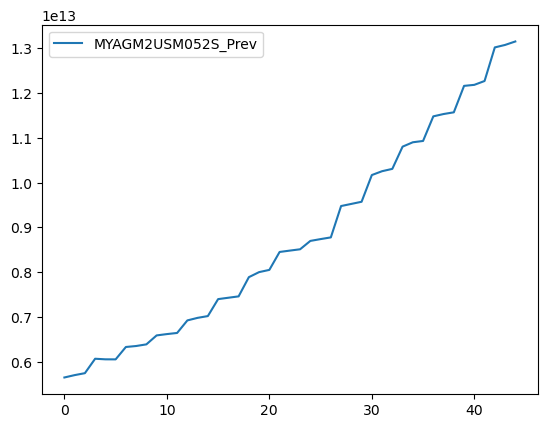

In [35]:
data_df.plot(y='MYAGM2USM052S_Prev')

In [36]:
data_df['Prev_MYAGM2USM052S_Prev'] = data_df['MYAGM2USM052S_Prev'].shift(1)
data_df['change_MYAGM2USM052S_Prev'] = data_df['MYAGM2USM052S_Prev'] - data_df['Prev_MYAGM2USM052S_Prev']


mod1 = smf.ols(f'change_MYAGM2USM052S_Prev ~ data_df.index + Prev_MYAGM2USM052S_Prev', data = data_df).fit() 
print(mod1.summary())

                                OLS Regression Results                               
Dep. Variable:     change_MYAGM2USM052S_Prev   R-squared:                       0.149
Model:                                   OLS   Adj. R-squared:                  0.107
Method:                        Least Squares   F-statistic:                     3.587
Date:                       Sun, 06 Oct 2024   Prob (F-statistic):             0.0367
Time:                               15:46:17   Log-Likelihood:                -1205.8
No. Observations:                         44   AIC:                             2418.
Df Residuals:                             41   BIC:                             2423.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [38]:


data_df['Prev_change_MYAGM2USM052S_Prev'] = data_df['change_MYAGM2USM052S_Prev'].shift(1)
data_df['change_change_Prev_MYAGM2USM052S_Prev'] = data_df['change_MYAGM2USM052S_Prev'] - data_df['Prev_change_MYAGM2USM052S_Prev']


mod1 = smf.ols(f'change_change_Prev_MYAGM2USM052S_Prev ~ 0 + Prev_change_MYAGM2USM052S_Prev', data = data_df).fit() 
print(mod1.summary())

                                          OLS Regression Results                                          
Dep. Variable:     change_change_Prev_MYAGM2USM052S_Prev   R-squared (uncentered):                   0.403
Model:                                               OLS   Adj. R-squared (uncentered):              0.389
Method:                                    Least Squares   F-statistic:                              28.37
Date:                                   Sun, 06 Oct 2024   Prob (F-statistic):                    3.67e-06
Time:                                           15:47:37   Log-Likelihood:                         -1192.5
No. Observations:                                     43   AIC:                                      2387.
Df Residuals:                                         42   BIC:                                      2389.
Df Model:                                              1                                                  
Covariance Type:                     

Change in MYAGM2USM052S is stationary

<AxesSubplot:>

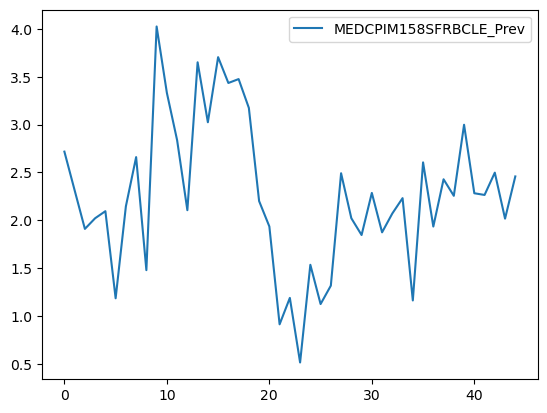

In [39]:
data_df.plot(y='MEDCPIM158SFRBCLE_Prev')

In [40]:
data_df['Prev_MEDCPIM158SFRBCLE_Prev'] = data_df['MEDCPIM158SFRBCLE_Prev'].shift(1)
data_df['change_MEDCPIM158SFRBCLE_Prev'] = data_df['MEDCPIM158SFRBCLE_Prev'] - data_df['Prev_MEDCPIM158SFRBCLE_Prev']


mod1 = smf.ols(f'change_MEDCPIM158SFRBCLE_Prev ~ data_df.index + Prev_MEDCPIM158SFRBCLE_Prev', data = data_df).fit() 
print(mod1.summary())

                                  OLS Regression Results                                 
Dep. Variable:     change_MEDCPIM158SFRBCLE_Prev   R-squared:                       0.252
Model:                                       OLS   Adj. R-squared:                  0.216
Method:                            Least Squares   F-statistic:                     6.912
Date:                           Sun, 06 Oct 2024   Prob (F-statistic):            0.00259
Time:                                   15:49:26   Log-Likelihood:                -44.690
No. Observations:                             44   AIC:                             95.38
Df Residuals:                                 41   BIC:                             100.7
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----

MEDCPIM158SFRBCLE is stationary

## REAINTRATREARAT10Y_Prev

<AxesSubplot:>

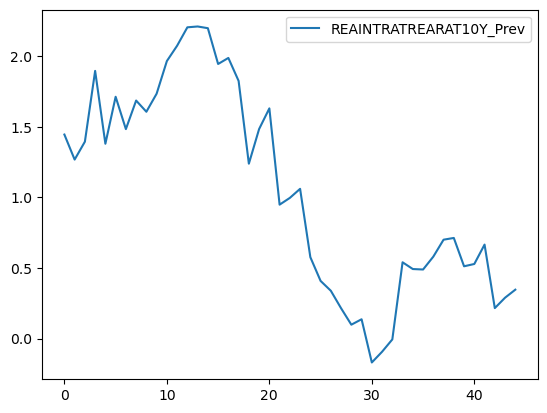

In [41]:
data_df.plot(y='REAINTRATREARAT10Y_Prev')

In [42]:
data_df['Prev_REAINTRATREARAT10Y_Prev'] = data_df['REAINTRATREARAT10Y_Prev'].shift(1)
data_df['change_REAINTRATREARAT10Y_Prev'] = data_df['REAINTRATREARAT10Y_Prev'] - data_df['Prev_REAINTRATREARAT10Y_Prev']


mod1 = smf.ols(f'change_REAINTRATREARAT10Y_Prev ~ data_df.index + Prev_REAINTRATREARAT10Y_Prev', data = data_df).fit() 
print(mod1.summary())

                                  OLS Regression Results                                  
Dep. Variable:     change_REAINTRATREARAT10Y_Prev   R-squared:                       0.092
Model:                                        OLS   Adj. R-squared:                  0.048
Method:                             Least Squares   F-statistic:                     2.088
Date:                            Sun, 06 Oct 2024   Prob (F-statistic):              0.137
Time:                                    15:50:20   Log-Likelihood:             -0.0034129
No. Observations:                              44   AIC:                             6.007
Df Residuals:                                  41   BIC:                             11.36
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      

In [44]:


data_df['Prev_change_REAINTRATREARAT10Y_Prev'] = data_df['change_REAINTRATREARAT10Y_Prev'].shift(1)
data_df['change_change_Prev_REAINTRATREARAT10Y_Prev'] = data_df['change_REAINTRATREARAT10Y_Prev'] - data_df['Prev_change_REAINTRATREARAT10Y_Prev']


mod1 = smf.ols(f'change_change_Prev_REAINTRATREARAT10Y_Prev ~ 0 + Prev_change_REAINTRATREARAT10Y_Prev', data = data_df).fit() 
print(mod1.summary())

                                             OLS Regression Results                                            
Dep. Variable:     change_change_Prev_REAINTRATREARAT10Y_Prev   R-squared (uncentered):                   0.613
Model:                                                    OLS   Adj. R-squared (uncentered):              0.604
Method:                                         Least Squares   F-statistic:                              66.60
Date:                                        Sun, 06 Oct 2024   Prob (F-statistic):                    3.34e-10
Time:                                                15:52:29   Log-Likelihood:                         -1.4592
No. Observations:                                          43   AIC:                                      4.918
Df Residuals:                                              42   BIC:                                      6.680
Df Model:                                                   1                                           

REAINTRATREARAT10Y is stationary to first degree

<AxesSubplot:>

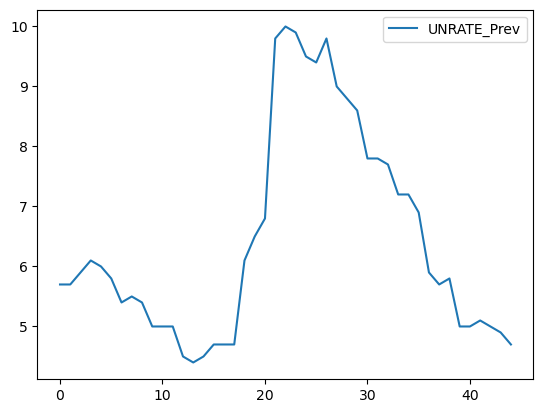

In [45]:
data_df.plot(y='UNRATE_Prev')

In [46]:
data_df['Prev_UNRATE_Prev'] = data_df['UNRATE_Prev'].shift(1)
data_df['change_UNRATE_Prev'] = data_df['UNRATE_Prev'] - data_df['Prev_UNRATE_Prev']


mod1 = smf.ols(f'change_UNRATE_Prev ~ data_df.index + Prev_UNRATE_Prev', data = data_df).fit() 
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:     change_UNRATE_Prev   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8562
Date:                Sun, 06 Oct 2024   Prob (F-statistic):              0.432
Time:                        15:54:01   Log-Likelihood:                -39.025
No. Observations:                  44   AIC:                             84.05
Df Residuals:                      41   BIC:                             89.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.365  

In [47]:


data_df['Prev_change_UNRATE_Prev'] = data_df['change_UNRATE_Prev'].shift(1)
data_df['change_change_Prev_UNRATE_Prev'] = data_df['change_UNRATE_Prev'] - data_df['Prev_change_UNRATE_Prev']


mod1 = smf.ols(f'change_change_Prev_UNRATE_Prev ~ 0 + Prev_change_UNRATE_Prev', data = data_df).fit() 
print(mod1.summary())

                                       OLS Regression Results                                      
Dep. Variable:     change_change_Prev_UNRATE_Prev   R-squared (uncentered):                   0.408
Model:                                        OLS   Adj. R-squared (uncentered):              0.394
Method:                             Least Squares   F-statistic:                              28.97
Date:                            Sun, 06 Oct 2024   Prob (F-statistic):                    3.05e-06
Time:                                    15:54:43   Log-Likelihood:                         -38.819
No. Observations:                              43   AIC:                                      79.64
Df Residuals:                                  42   BIC:                                      81.40
Df Model:                                       1                                                  
Covariance Type:                        nonrobust                                                  


UNRATE stationary to first degree

<AxesSubplot:>

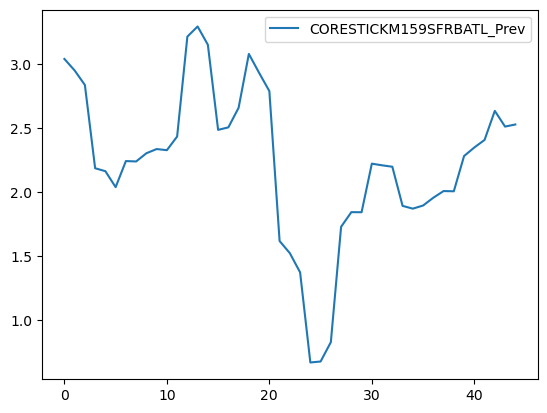

In [48]:
data_df.plot(y='CORESTICKM159SFRBATL_Prev')

In [49]:
data_df['Prev_CORESTICKM159SFRBATL_Prev'] = data_df['CORESTICKM159SFRBATL_Prev'].shift(1)
data_df['change_CORESTICKM159SFRBATL_Prev'] = data_df['CORESTICKM159SFRBATL_Prev'] - data_df['Prev_CORESTICKM159SFRBATL_Prev']


mod1 = smf.ols(f'change_CORESTICKM159SFRBATL_Prev ~ data_df.index + Prev_CORESTICKM159SFRBATL_Prev', data = data_df).fit() 
print(mod1.summary())

                                   OLS Regression Results                                   
Dep. Variable:     change_CORESTICKM159SFRBATL_Prev   R-squared:                       0.097
Model:                                          OLS   Adj. R-squared:                  0.053
Method:                               Least Squares   F-statistic:                     2.195
Date:                              Sun, 06 Oct 2024   Prob (F-statistic):              0.124
Time:                                      15:56:00   Log-Likelihood:                -12.222
No. Observations:                                44   AIC:                             30.44
Df Residuals:                                    41   BIC:                             35.80
Df Model:                                         2                                         
Covariance Type:                          nonrobust                                         
                                     coef    std err          t      P

In [50]:


data_df['Prev_change_CORESTICKM159SFRBATL_Prev'] = data_df['change_CORESTICKM159SFRBATL_Prev'].shift(1)
data_df['change_change_Prev_CORESTICKM159SFRBATL_Prev'] = data_df['change_CORESTICKM159SFRBATL_Prev'] - data_df['Prev_change_CORESTICKM159SFRBATL_Prev']


mod1 = smf.ols(f'change_change_Prev_CORESTICKM159SFRBATL_Prev ~ 0 + Prev_change_CORESTICKM159SFRBATL_Prev', data = data_df).fit() 
print(mod1.summary())

                                              OLS Regression Results                                             
Dep. Variable:     change_change_Prev_CORESTICKM159SFRBATL_Prev   R-squared (uncentered):                   0.403
Model:                                                      OLS   Adj. R-squared (uncentered):              0.389
Method:                                           Least Squares   F-statistic:                              28.40
Date:                                          Sun, 06 Oct 2024   Prob (F-statistic):                    3.63e-06
Time:                                                  15:56:37   Log-Likelihood:                         -13.791
No. Observations:                                            43   AIC:                                      29.58
Df Residuals:                                                42   BIC:                                      31.34
Df Model:                                                     1                         

CORESTICKM159SFRBATL stationary to first degree

In [108]:
data_df['change_UNRATE_Prev_1'] = data_df['change_UNRATE_Prev'].shift(1)
data_df['change_UNRATE_Prev_2'] = data_df['change_UNRATE_Prev'].shift(2)
data_df['change_UNRATE_Prev_3'] = data_df['change_UNRATE_Prev'].shift(3)
data_df['change_UNRATE_Prev_4'] = data_df['change_UNRATE_Prev'].shift(4)
data_df['change_UNRATE_Prev_5'] = data_df['change_UNRATE_Prev'].shift(5)

data_df['change_CORESTICKM159SFRBATL_Prev_1'] = data_df['change_CORESTICKM159SFRBATL_Prev'].shift(1)
data_df['change_CORESTICKM159SFRBATL_Prev_2'] = data_df['change_CORESTICKM159SFRBATL_Prev'].shift(2)
data_df['change_CORESTICKM159SFRBATL_Prev_3'] = data_df['change_CORESTICKM159SFRBATL_Prev'].shift(3)
data_df['change_CORESTICKM159SFRBATL_Prev_4'] = data_df['change_CORESTICKM159SFRBATL_Prev'].shift(4)
data_df['change_CORESTICKM159SFRBATL_Prev_5'] = data_df['change_CORESTICKM159SFRBATL_Prev'].shift(5)

data_df['change_REAINTRATREARAT10Y_Prev_1'] = data_df['change_REAINTRATREARAT10Y_Prev'].shift(1)
data_df['change_REAINTRATREARAT10Y_Prev_2'] = data_df['change_REAINTRATREARAT10Y_Prev'].shift(2)
data_df['change_REAINTRATREARAT10Y_Prev_3'] = data_df['change_REAINTRATREARAT10Y_Prev'].shift(3)
data_df['change_REAINTRATREARAT10Y_Prev_4'] = data_df['change_REAINTRATREARAT10Y_Prev'].shift(4)
data_df['change_REAINTRATREARAT10Y_Prev_5'] = data_df['change_REAINTRATREARAT10Y_Prev'].shift(5)

data_df['MEDCPIM158SFRBCLE_Prev_1'] = data_df['MEDCPIM158SFRBCLE_Prev'].shift(1)
data_df['MEDCPIM158SFRBCLE_Prev_2'] = data_df['MEDCPIM158SFRBCLE_Prev'].shift(2)
data_df['MEDCPIM158SFRBCLE_Prev_3'] = data_df['MEDCPIM158SFRBCLE_Prev'].shift(3)

data_df['change_MYAGM2USM052S_Prev_1'] = data_df['change_MYAGM2USM052S_Prev'].shift(1)
data_df['change_MYAGM2USM052S_Prev_2'] = data_df['change_MYAGM2USM052S_Prev'].shift(2)
data_df['change_MYAGM2USM052S_Prev_3'] = data_df['change_MYAGM2USM052S_Prev'].shift(3)
data_df['change_MYAGM2USM052S_Prev_4'] = data_df['change_MYAGM2USM052S_Prev'].shift(4)
data_df['change_MYAGM2USM052S_Prev_5'] = data_df['change_MYAGM2USM052S_Prev'].shift(5)

# Total Sales Used

<AxesSubplot:>

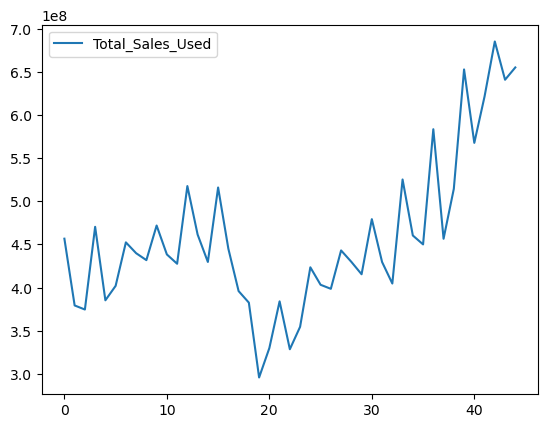

In [20]:
data_df.plot(y='Total_Sales_Used')

In [29]:
data_df['Prev_Total_Sales_Used'] = data_df['Total_Sales_Used'].shift(1)
data_df['change_Total_Sales_Used'] = data_df['Total_Sales_Used'] - data_df['Prev_Total_Sales_Used']


mod1 = smf.ols(f'change_Total_Sales_Used ~ data_df.index + Prev_Total_Sales_Used', data = data_df).fit() 
print(mod1.summary())

                               OLS Regression Results                              
Dep. Variable:     change_Total_Sales_Used   R-squared:                       0.194
Model:                                 OLS   Adj. R-squared:                  0.154
Method:                      Least Squares   F-statistic:                     4.926
Date:                     Sun, 06 Oct 2024   Prob (F-statistic):             0.0121
Time:                             15:27:43   Log-Likelihood:                -848.21
No. Observations:                       44   AIC:                             1702.
Df Residuals:                           41   BIC:                             1708.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

<AxesSubplot:>

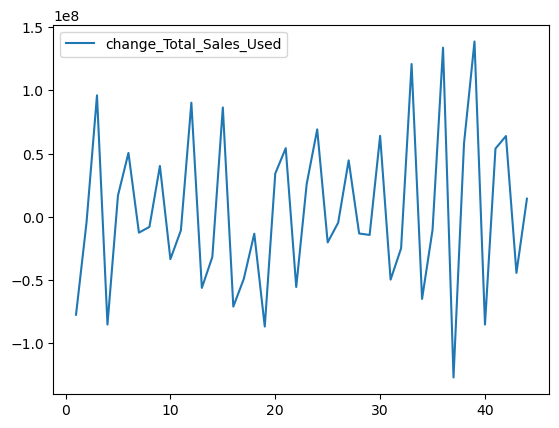

In [31]:
data_df.plot(y='change_Total_Sales_Used')

In [33]:
data_df['Prev_Total_Sales_Used'] = data_df['Total_Sales_Used'].shift(1)
data_df['change_Total_Sales_Used'] = data_df['Total_Sales_Used'] - data_df['Prev_Total_Sales_Used']

data_df['Prev_change_Total_Sales_Used'] = data_df['change_Total_Sales_Used'].shift(1)
data_df['change_change_Prev_Total_Sales_Used'] = data_df['change_Total_Sales_Used'] - data_df['Prev_change_Total_Sales_Used']


mod1 = smf.ols(f'change_change_Prev_Total_Sales_Used ~ 0 + Prev_change_Total_Sales_Used', data = data_df).fit() 
print(mod1.summary())

                                         OLS Regression Results                                         
Dep. Variable:     change_change_Prev_Total_Sales_Used   R-squared (uncentered):                   0.709
Model:                                             OLS   Adj. R-squared (uncentered):              0.702
Method:                                  Least Squares   F-statistic:                              102.4
Date:                                 Sun, 06 Oct 2024   Prob (F-statistic):                    7.84e-13
Time:                                         15:41:49   Log-Likelihood:                         -829.50
No. Observations:                                   43   AIC:                                      1661.
Df Residuals:                                       42   BIC:                                      1663.
Df Model:                                            1                                                  
Covariance Type:                             nonrobust 

Total Sales Used to first derivative is therefore stationary by Dickey-Fuller test since -10.120 < -3.41

In [176]:
formula = 'change_MYAGM2USM052S_Prev + change_CORESTICKM159SFRBATL_Prev + change_UNRATE_Prev + change_REAINTRATREARAT10Y_Prev'

lags = 5

variables = ['change_CORESTICKM159SFRBATL_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_MYAGM2USM052S_Prev']

for var in variables:

    for i in range(1, lags):

        formula = formula + f' + {var}_{i}'




mod1 = smf.ols(f'change_Total_Sales_Used ~ {formula}', data = data_df)
results = mod1.fit(cov_type='HAC', cov_kwds={'maxlags': 4})  
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     change_Total_Sales_Used   R-squared:                       0.800
Model:                                 OLS   Adj. R-squared:                  0.589
Method:                      Least Squares   F-statistic:                     7.715
Date:                     Tue, 08 Oct 2024   Prob (F-statistic):           3.38e-05
Time:                             14:25:13   Log-Likelihood:                -742.31
No. Observations:                       40   AIC:                             1527.
Df Residuals:                           19   BIC:                             1562.
Df Model:                               20                                         
Covariance Type:                       HAC                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

/Users/evanbruno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 15
  warnings.warn('covariance of constraints does not have full '


In [177]:

from statsmodels.tsa.stattools import acf


# Get residuals
residuals = results.resid


# Calculate autocorrelations for the first four lags
acf_res = acf(residuals, fft=False, nlags=5)

# Print autocorrelations
print("Autocorrelations for the first four lags:")
for lag, acf_value in enumerate(acf_res):
    print(f"Lag {lag + 1}: {acf_value}")

Autocorrelations for the first four lags:
Lag 1: 1.0
Lag 2: -0.17739276165447707
Lag 3: 0.047373392259667566
Lag 4: 0.18546968185085225
Lag 5: -0.22186273130641299
Lag 6: 0.21402696619628145


In [169]:
1.96 / math.sqrt(len(data_df))

0.2921795490599725

In [138]:
bic_dict = {}


for lag in range(2, 7):


    formula = 'change_MYAGM2USM052S_Prev + change_CORESTICKM159SFRBATL_Prev + change_UNRATE_Prev + change_REAINTRATREARAT10Y_Prev'

    lags = lag

    variables = ['change_CORESTICKM159SFRBATL_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_MYAGM2USM052S_Prev']

    for var in variables:

        for i in range(1, lags):

            formula = formula + f' + {var}_{i}'




    mod1 = smf.ols(f'change_Total_Sales_Used ~ {formula}', data = data_df)
    results = mod1.fit(cov_type='HAC', cov_kwds={'maxlags': 4})  

    bic_dict[lag - 1] = results.bic

In [139]:
bic_dict

{1: 1637.1805679460304,
 2: 1613.6098287673055,
 3: 1590.812745814281,
 4: 1562.084627550116,
 5: 1528.6118063090337}

In [142]:
data_df['Resid'] = residuals ** 2

mod1 = smf.ols(f'Resid ~ {formula}', data = data_df)
results = mod1.fit()  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Resid   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                 -0.365
Method:                 Least Squares   F-statistic:                    0.5763
Date:                Tue, 08 Oct 2024   Prob (F-statistic):              0.886
Time:                        12:59:29   Log-Likelihood:                -1373.4
No. Observations:                  39   AIC:                             2797.
Df Residuals:                      14   BIC:                             2838.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [143]:
len(data_df) * 0.497

22.365

at 24 degrees of freedom 5% crit value is 36.42 and since 22.365 is less than this value passes test of homoskedaticity

## Assumptions of Finite Distributed Lag Model

1. Time series for both dependent and independent variables are stationary as testing previously
2. finite distributed lag model is written as y = alpha + B0x ... 
3. error term is not auto correlated as the 5% crit value is 0.29 and the correlations do not exceed this threshold
4. test for homoskedaticity remains valid

# Total Sales New

<AxesSubplot:>

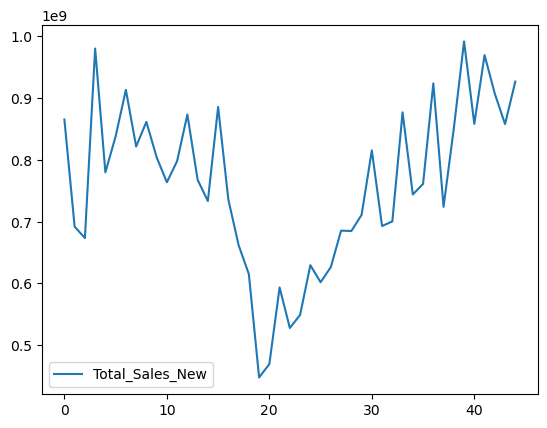

In [218]:
data_df.plot(y='Total_Sales_New')

In [219]:
data_df['Prev_Total_Sales_New'] = data_df['Total_Sales_New'].shift(1)
data_df['change_Total_Sales_New'] = data_df['Total_Sales_New'] - data_df['Prev_Total_Sales_New']


mod1 = smf.ols(f'change_Total_Sales_New ~ data_df.index + Prev_Total_Sales_New', data = data_df).fit() 
print(mod1.summary())

                              OLS Regression Results                              
Dep. Variable:     change_Total_Sales_New   R-squared:                       0.184
Model:                                OLS   Adj. R-squared:                  0.144
Method:                     Least Squares   F-statistic:                     4.613
Date:                    Tue, 08 Oct 2024   Prob (F-statistic):             0.0156
Time:                            16:07:23   Log-Likelihood:                -873.04
No. Observations:                      44   AIC:                             1752.
Df Residuals:                          41   BIC:                             1757.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Nonstaionary

In [220]:
data_df['Prev_Total_Sales_New'] = data_df['Total_Sales_New'].shift(1)
data_df['change_Total_Sales_New'] = data_df['Total_Sales_New'] - data_df['Prev_Total_Sales_New']

data_df['Prev_change_Total_Sales_New'] = data_df['change_Total_Sales_New'].shift(1)
data_df['change_change_Prev_Total_Sales_New'] = data_df['change_Total_Sales_New'] - data_df['Prev_change_Total_Sales_New']


mod1 = smf.ols(f'change_change_Prev_Total_Sales_New ~ 0 + Prev_change_Total_Sales_New', data = data_df).fit() 
print(mod1.summary())

                                         OLS Regression Results                                        
Dep. Variable:     change_change_Prev_Total_Sales_New   R-squared (uncentered):                   0.712
Model:                                            OLS   Adj. R-squared (uncentered):              0.705
Method:                                 Least Squares   F-statistic:                              103.9
Date:                                Tue, 08 Oct 2024   Prob (F-statistic):                    6.31e-13
Time:                                        16:07:25   Log-Likelihood:                         -852.88
No. Observations:                                  43   AIC:                                      1708.
Df Residuals:                                      42   BIC:                                      1710.
Df Model:                                           1                                                  
Covariance Type:                            nonrobust           

Stationary I(1)

In [221]:
formula = 'change_MYAGM2USM052S_Prev + change_CORESTICKM159SFRBATL_Prev + change_UNRATE_Prev + change_REAINTRATREARAT10Y_Prev'

lags = 5

variables = ['change_CORESTICKM159SFRBATL_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_MYAGM2USM052S_Prev']

for var in variables:

    for i in range(1, lags):

        formula = formula + f' + {var}_{i}'




mod1 = smf.ols(f'change_Total_Sales_New ~ {formula}', data = data_df)
results = mod1.fit(cov_type='HAC', cov_kwds={'maxlags': 4})  
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     change_Total_Sales_New   R-squared:                       0.750
Model:                                OLS   Adj. R-squared:                  0.487
Method:                     Least Squares   F-statistic:                     11.57
Date:                    Tue, 08 Oct 2024   Prob (F-statistic):           1.49e-06
Time:                            16:08:26   Log-Likelihood:                -764.60
No. Observations:                      40   AIC:                             1571.
Df Residuals:                          19   BIC:                             1607.
Df Model:                              20                                         
Covariance Type:                      HAC                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

/Users/evanbruno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 15
  warnings.warn('covariance of constraints does not have full '


In [247]:
from sklearn.metrics import mean_squared_error

formula = ['change_MYAGM2USM052S_Prev', 'change_CORESTICKM159SFRBATL_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev']

lags = 5

variables = ['change_CORESTICKM159SFRBATL_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_MYAGM2USM052S_Prev']

for var in variables:

    for i in range(1, lags):

        formula.append(f'{var}_{i}')
        
formula.append('change_Total_Sales_Used')

test_df = data_df[formula].dropna()

pred = model.predict(test_df[formula[:-1]])

mse = mean_squared_error(test_df['change_Total_Sales_Used'], pred)

mse

2124002948538017.5

In [175]:

from statsmodels.tsa.stattools import acf


# Get residuals
residuals = results.resid


# Calculate autocorrelations for the first four lags
acf_res = acf(residuals, fft=False, nlags=5)

# Print autocorrelations
print("Autocorrelations for the first four lags:")
for lag, acf_value in enumerate(acf_res):
    print(f"Lag {lag + 1}: {acf_value}")

Autocorrelations for the first four lags:
Lag 1: 1.0
Lag 2: -0.1413046968145453
Lag 3: -0.07884733764132414
Lag 4: 0.015430903873462376
Lag 5: -0.16940920313859778
Lag 6: 0.1011752931233515


In [178]:
1.96 / math.sqrt(len(data_df))

0.2921795490599725

In [179]:
data_df['Resid'] = residuals ** 2

mod1 = smf.ols(f'Resid ~ {formula}', data = data_df)
results = mod1.fit()  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Resid   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                 -0.325
Method:                 Least Squares   F-statistic:                    0.5222
Date:                Tue, 08 Oct 2024   Prob (F-statistic):              0.921
Time:                        14:29:40   Log-Likelihood:                -1427.7
No. Observations:                  40   AIC:                             2897.
Df Residuals:                      19   BIC:                             2933.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [181]:
len(data_df) * 0.355

15.975

at 24 degrees of freedom 5% crit value is 36.42 and since 15.975 is less than this value passes test of homoskedaticity

## Assumptions of Finite Distributed Lag Model

1. Time series for both dependent and independent variables are stationary as testing previously
2. finite distributed lag model is written as y = alpha + B0x ... 
3. error term is not auto correlated as the 5% crit value is 0.29 and the correlations do not exceed this threshold
4. test for homoskedaticity remains valid

# Avg Used

<AxesSubplot:>

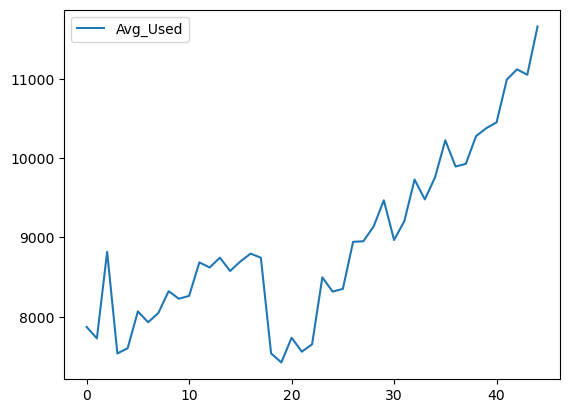

In [183]:
data_df.plot(y='Avg_Used')

In [184]:
data_df['Prev_Avg_Used'] = data_df['Avg_Used'].shift(1)
data_df['change_Avg_Used'] = data_df['Avg_Used'] - data_df['Prev_Avg_Used']


mod1 = smf.ols(f'change_Avg_Used ~ data_df.index + Prev_Avg_Used', data = data_df).fit() 
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:        change_Avg_Used   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.655
Date:                Tue, 08 Oct 2024   Prob (F-statistic):             0.0824
Time:                        14:32:30   Log-Likelihood:                -325.71
No. Observations:                  44   AIC:                             657.4
Df Residuals:                      41   BIC:                             662.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1590.5494    807.794      1.969

In [185]:
data_df['Prev_Avg_Used'] = data_df['Avg_Used'].shift(1)
data_df['change_Avg_Used'] = data_df['Avg_Used'] - data_df['Prev_Avg_Used']

data_df['Prev_change_Avg_Used'] = data_df['change_Avg_Used'].shift(1)
data_df['change_change_Prev_Avg_Used'] = data_df['change_Avg_Used'] - data_df['Prev_change_Avg_Used']


mod1 = smf.ols(f'change_change_Prev_Avg_Used ~ 0 + Prev_change_Avg_Used', data = data_df).fit() 
print(mod1.summary())

                                     OLS Regression Results                                     
Dep. Variable:     change_change_Prev_Avg_Used   R-squared (uncentered):                   0.612
Model:                                     OLS   Adj. R-squared (uncentered):              0.603
Method:                          Least Squares   F-statistic:                              66.30
Date:                         Tue, 08 Oct 2024   Prob (F-statistic):                    3.54e-10
Time:                                 14:33:24   Log-Likelihood:                         -320.96
No. Observations:                           43   AIC:                                      643.9
Df Residuals:                               42   BIC:                                      645.7
Df Model:                                    1                                                  
Covariance Type:                     nonrobust                                                  
                           coe

In [186]:
formula = 'change_MYAGM2USM052S_Prev + change_CORESTICKM159SFRBATL_Prev + change_UNRATE_Prev + change_REAINTRATREARAT10Y_Prev'

lags = 5

variables = ['change_CORESTICKM159SFRBATL_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_MYAGM2USM052S_Prev']

for var in variables:

    for i in range(1, lags):

        formula = formula + f' + {var}_{i}'




mod1 = smf.ols(f'change_Avg_Used ~ {formula}', data = data_df)
results = mod1.fit(cov_type='HAC', cov_kwds={'maxlags': 4})  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        change_Avg_Used   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     16.64
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           7.59e-08
Time:                        14:33:44   Log-Likelihood:                -262.79
No. Observations:                  40   AIC:                             567.6
Df Residuals:                      19   BIC:                             603.1
Df Model:                          20                                         
Covariance Type:                  HAC                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

/Users/evanbruno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 15
  warnings.warn('covariance of constraints does not have full '


In [187]:

from statsmodels.tsa.stattools import acf


# Get residuals
residuals = results.resid


# Calculate autocorrelations for the first four lags
acf_res = acf(residuals, fft=False, nlags=5)

# Print autocorrelations
print("Autocorrelations for the first four lags:")
for lag, acf_value in enumerate(acf_res):
    print(f"Lag {lag + 1}: {acf_value}")

Autocorrelations for the first four lags:
Lag 1: 1.0
Lag 2: 0.15951108071863396
Lag 3: 0.19185326012079484
Lag 4: 0.21401822767488965
Lag 5: -0.26992824609571175
Lag 6: -0.03720902705586824


In [189]:
data_df['Resid'] = residuals ** 2

mod1 = smf.ols(f'Resid ~ {formula}', data = data_df)
results = mod1.fit()  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Resid   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                 -0.057
Method:                 Least Squares   F-statistic:                    0.9145
Date:                Tue, 08 Oct 2024   Prob (F-statistic):              0.590
Time:                        14:34:18   Log-Likelihood:                -464.74
No. Observations:                  39   AIC:                             979.5
Df Residuals:                      14   BIC:                             1021.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [190]:
len(data_df) * 0.611

27.495

at 24 degrees of freedom 5% crit value is 36.42 and since 27.495 is less than this value passes test of homoskedaticity

## Assumptions of Finite Distributed Lag Model

1. Time series for both dependent and independent variables are stationary as testing previously
2. finite distributed lag model is written as y = alpha + B0x ... 
3. error term is not auto correlated as the 5% crit value is 0.29 and the correlations do not exceed this threshold
4. test for homoskedaticity remains valid

# Avg_New

<AxesSubplot:>

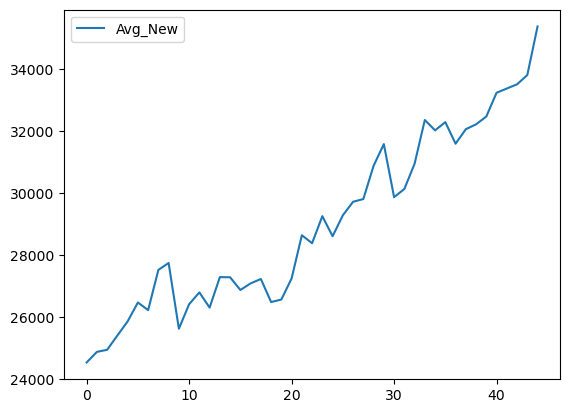

In [191]:
data_df.plot(y='Avg_New')

In [192]:
data_df['Prev_Avg_New'] = data_df['Avg_New'].shift(1)
data_df['change_Avg_New'] = data_df['Avg_New'] - data_df['Prev_Avg_New']


mod1 = smf.ols(f'change_Avg_New ~ data_df.index + Prev_Avg_New', data = data_df).fit() 
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:         change_Avg_New   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     4.612
Date:                Tue, 08 Oct 2024   Prob (F-statistic):             0.0156
Time:                        14:36:07   Log-Likelihood:                -347.66
No. Observations:                  44   AIC:                             701.3
Df Residuals:                      41   BIC:                             706.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9953.8070   3344.954      2.976

In [193]:
data_df['Prev_Avg_New'] = data_df['Avg_New'].shift(1)
data_df['change_Avg_New'] = data_df['Avg_New'] - data_df['Prev_Avg_New']

data_df['Prev_change_Avg_New'] = data_df['change_Avg_New'].shift(1)
data_df['change_change_Prev_Avg_New'] = data_df['change_Avg_New'] - data_df['Prev_change_Avg_New']


mod1 = smf.ols(f'change_change_Prev_Avg_New ~ 0 + Prev_change_Avg_New', data = data_df).fit() 
print(mod1.summary())

                                     OLS Regression Results                                    
Dep. Variable:     change_change_Prev_Avg_New   R-squared (uncentered):                   0.523
Model:                                    OLS   Adj. R-squared (uncentered):              0.512
Method:                         Least Squares   F-statistic:                              46.10
Date:                        Tue, 08 Oct 2024   Prob (F-statistic):                    2.91e-08
Time:                                14:36:49   Log-Likelihood:                         -346.70
No. Observations:                          43   AIC:                                      695.4
Df Residuals:                              42   BIC:                                      697.2
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
                          coef    std er

In [194]:
formula = 'change_MYAGM2USM052S_Prev + change_CORESTICKM159SFRBATL_Prev + change_UNRATE_Prev + change_REAINTRATREARAT10Y_Prev'

lags = 5

variables = ['change_CORESTICKM159SFRBATL_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_MYAGM2USM052S_Prev']

for var in variables:

    for i in range(1, lags):

        formula = formula + f' + {var}_{i}'




mod1 = smf.ols(f'change_Avg_New ~ {formula}', data = data_df)
results = mod1.fit(cov_type='HAC', cov_kwds={'maxlags': 4})  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         change_Avg_New   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     25.15
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           2.17e-09
Time:                        14:44:11   Log-Likelihood:                -305.18
No. Observations:                  40   AIC:                             652.4
Df Residuals:                      19   BIC:                             687.8
Df Model:                          20                                         
Covariance Type:                  HAC                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

/Users/evanbruno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 15
  warnings.warn('covariance of constraints does not have full '


In [195]:

from statsmodels.tsa.stattools import acf


# Get residuals
residuals = results.resid


# Calculate autocorrelations for the first four lags
acf_res = acf(residuals, fft=False, nlags=5)

# Print autocorrelations
print("Autocorrelations for the first four lags:")
for lag, acf_value in enumerate(acf_res):
    print(f"Lag {lag + 1}: {acf_value}")

Autocorrelations for the first four lags:
Lag 1: 1.0
Lag 2: -0.147966219057589
Lag 3: -0.13890409324036004
Lag 4: -0.07050741695448696
Lag 5: -0.12539219610688457
Lag 6: 0.013472396058880938


In [196]:
data_df['Resid'] = residuals ** 2

mod1 = smf.ols(f'Resid ~ {formula}', data = data_df)
results = mod1.fit()  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Resid   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                 -0.195
Method:                 Least Squares   F-statistic:                    0.6824
Date:                Tue, 08 Oct 2024   Prob (F-statistic):              0.798
Time:                        14:44:36   Log-Likelihood:                -567.82
No. Observations:                  40   AIC:                             1178.
Df Residuals:                      19   BIC:                             1213.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [197]:
len(data_df) * 0.418

18.81

at 24 degrees of freedom 5% crit value is 36.42 and since 18.81 is less than this value passes test of homoskedaticity

## Assumptions of Finite Distributed Lag Model

1. Time series for both dependent and independent variables are stationary as testing previously
2. finite distributed lag model is written as y = alpha + B0x ... 
3. error term is not auto correlated as the 5% crit value is 0.29 and the correlations do not exceed this threshold
4. test for homoskedaticity remains valid

# Ratio_Used_New

<AxesSubplot:>

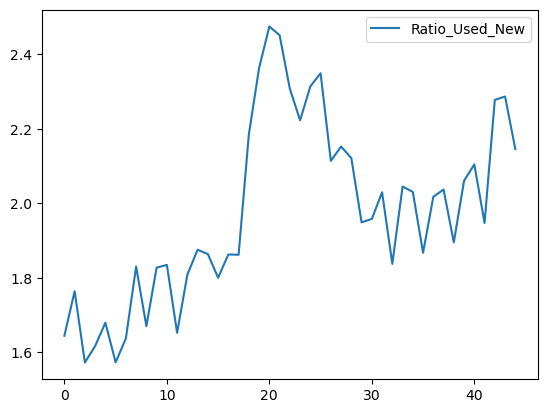

In [198]:
data_df.plot(y='Ratio_Used_New')

In [203]:
data_df['Prev_Ratio_Used_New'] = data_df['Ratio_Used_New'].shift(1)
data_df['change_Ratio_Used_New'] = data_df['Ratio_Used_New'] - data_df['Prev_Ratio_Used_New']


mod1 = smf.ols(f'change_Ratio_Used_New ~ data_df.index + Prev_Ratio_Used_New', data = data_df).fit() 
print(mod1.summary())

                              OLS Regression Results                             
Dep. Variable:     change_Ratio_Used_New   R-squared:                       0.757
Model:                               OLS   Adj. R-squared:                  0.744
Method:                    Least Squares   F-statistic:                     60.69
Date:                   Tue, 08 Oct 2024   Prob (F-statistic):           1.06e-12
Time:                           14:57:16   Log-Likelihood:                 11.306
No. Observations:                     42   AIC:                            -16.61
Df Residuals:                         39   BIC:                            -11.40
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Inte

In [204]:
data_df['Prev_Ratio_Used_New'] = data_df['Ratio_Used_New'].shift(1)
data_df['change_Ratio_Used_New'] = data_df['Ratio_Used_New'] - data_df['Prev_Ratio_Used_New']

data_df['Prev_change_Ratio_Used_New'] = data_df['change_Ratio_Used_New'].shift(1)
data_df['change_change_Prev_Ratio_Used_New'] = data_df['change_Ratio_Used_New'] - data_df['Prev_change_Ratio_Used_New']


mod1 = smf.ols(f'change_change_Prev_Ratio_Used_New ~ 0 + Prev_change_Ratio_Used_New', data = data_df).fit() 
print(mod1.summary())

                                        OLS Regression Results                                        
Dep. Variable:     change_change_Prev_Ratio_Used_New   R-squared (uncentered):                   0.796
Model:                                           OLS   Adj. R-squared (uncentered):              0.791
Method:                                Least Squares   F-statistic:                              156.4
Date:                               Tue, 08 Oct 2024   Prob (F-statistic):                    2.10e-15
Time:                                       15:00:42   Log-Likelihood:                         -8.8690
No. Observations:                                 41   AIC:                                      19.74
Df Residuals:                                     40   BIC:                                      21.45
Df Model:                                          1                                                  
Covariance Type:                           nonrobust                     

In [205]:
formula = 'change_MYAGM2USM052S_Prev + change_CORESTICKM159SFRBATL_Prev + change_UNRATE_Prev + change_REAINTRATREARAT10Y_Prev'

lags = 5

variables = ['change_CORESTICKM159SFRBATL_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_MYAGM2USM052S_Prev']

for var in variables:

    for i in range(1, lags):

        formula = formula + f' + {var}_{i}'




mod1 = smf.ols(f'change_Ratio_Used_New ~ {formula}', data = data_df)
results = mod1.fit(cov_type='HAC', cov_kwds={'maxlags': 4})  
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     change_Ratio_Used_New   R-squared:                       0.878
Model:                               OLS   Adj. R-squared:                  0.750
Method:                    Least Squares   F-statistic:                     40.84
Date:                   Tue, 08 Oct 2024   Prob (F-statistic):           2.89e-11
Time:                           15:01:03   Log-Likelihood:                 24.835
No. Observations:                     40   AIC:                            -7.671
Df Residuals:                         19   BIC:                             27.80
Df Model:                             20                                         
Covariance Type:                     HAC                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

/Users/evanbruno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 15
  warnings.warn('covariance of constraints does not have full '


In [206]:

from statsmodels.tsa.stattools import acf


# Get residuals
residuals = results.resid


# Calculate autocorrelations for the first four lags
acf_res = acf(residuals, fft=False, nlags=5)

# Print autocorrelations
print("Autocorrelations for the first four lags:")
for lag, acf_value in enumerate(acf_res):
    print(f"Lag {lag + 1}: {acf_value}")

Autocorrelations for the first four lags:
Lag 1: 1.0
Lag 2: -0.5571991522811359
Lag 3: -0.035644870376572685
Lag 4: 0.21759515362982318
Lag 5: -0.12426180380866925
Lag 6: -0.10037191396159378


In [207]:
1.96 / math.sqrt(len(data_df))

0.2921795490599725

In [210]:
# serial correlation present at lag 2 so eliminate it and re-run the regression
data_df['change_Ratio_Used_New_lag_1'] = data_df['change_Ratio_Used_New'].shift(1)

data_df['change_Ratio_Used_New_lag_2'] = data_df['change_Ratio_Used_New'].shift(2)

formula = 'change_MYAGM2USM052S_Prev + change_CORESTICKM159SFRBATL_Prev + change_UNRATE_Prev + change_REAINTRATREARAT10Y_Prev'

lags = 5

variables = ['change_CORESTICKM159SFRBATL_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_MYAGM2USM052S_Prev']

for var in variables:

    for i in range(1, lags):

        formula = formula + f' + {var}_{i}'




mod1 = smf.ols(f'change_Ratio_Used_New ~ {formula} + change_Ratio_Used_New_lag_2 + change_Ratio_Used_New_lag_1', data = data_df)
results = mod1.fit(cov_type='HAC', cov_kwds={'maxlags': 4})  
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     change_Ratio_Used_New   R-squared:                       0.967
Model:                               OLS   Adj. R-squared:                  0.924
Method:                    Least Squares   F-statistic:                     335.3
Date:                   Tue, 08 Oct 2024   Prob (F-statistic):           4.08e-18
Time:                           15:12:23   Log-Likelihood:                 50.927
No. Observations:                     40   AIC:                            -55.85
Df Residuals:                         17   BIC:                            -17.01
Df Model:                             22                                         
Covariance Type:                     HAC                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

/Users/evanbruno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 22, but rank is 17
  warnings.warn('covariance of constraints does not have full '


In [211]:

from statsmodels.tsa.stattools import acf


# Get residuals
residuals = results.resid


# Calculate autocorrelations for the first four lags
acf_res = acf(residuals, fft=False, nlags=5)

# Print autocorrelations
print("Autocorrelations for the first four lags:")
for lag, acf_value in enumerate(acf_res):
    print(f"Lag {lag + 1}: {acf_value}")

Autocorrelations for the first four lags:
Lag 1: 1.0
Lag 2: -0.21348536431173312
Lag 3: 0.02346238095498797
Lag 4: -0.2647241912556469
Lag 5: 0.14627391386719932
Lag 6: -0.02544155892795529


eliminated serial correlation

In [217]:
data_df['Resid'] = residuals ** 2

mod1 = smf.ols(f'Resid ~ {formula} + change_Ratio_Used_New_lag_2 + change_Ratio_Used_New_lag_1', data = data_df)
results = mod1.fit()  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Resid   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                 -0.269
Method:                 Least Squares   F-statistic:                    0.6243
Date:                Tue, 08 Oct 2024   Prob (F-statistic):              0.852
Time:                        15:23:11   Log-Likelihood:                 151.22
No. Observations:                  40   AIC:                            -256.4
Df Residuals:                      17   BIC:                            -217.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [216]:
len(data_df) * 0.447

20.115000000000002

at 24 degrees of freedom 5% crit value is 36.42 and since 20.11 is less than this value passes test of homoskedaticity

## Assumptions of Finite Distributed Lag Model

1. Time series for both dependent and independent variables are stationary as testing previously
2. finite distributed lag model is written as y = alpha + B0x ... 
3. error term is not auto correlated as the 5% crit value is 0.29 and the correlations do not exceed this threshold
4. test for homoskedaticity remains valid